In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
df = pd.read_csv("data/super_store.csv" , encoding="ISO-8859-1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
df.isna().sum() #checked Postal Code has 41296 na data

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
df.shape #Size

(51290, 24)

### Q.1 Who are the top-20 most profitable customers. show them thorogh P lots

In [7]:
result = df.groupby(["Customer Name"])["Profit"].aggregate(np.sum).reset_index().sort_values("Profit",ascending = False).head(20)
result.head(3)

,Customer Name,Profit
731,Tamara Chand,8672.8989
623,Raymond Buch,8453.0495
672,Sanjit Chand,8205.3799


In [48]:
result.shape

(20, 2)

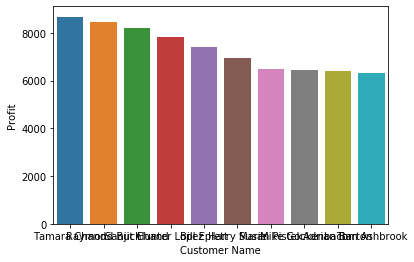

In [8]:
sns.barplot(x= "Customer Name" , y ="Profit", data = result.head(10))

### Q.2 What is the distribution of our customer segment

In [9]:
descending_order = df["Segment"].value_counts().index

In [10]:
descending_order

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object')

In [12]:
df["Segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [13]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

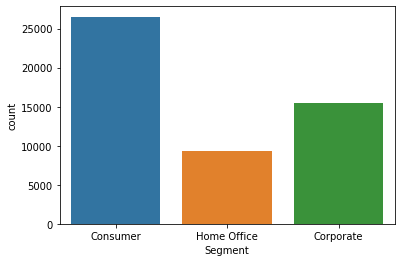

In [14]:
sns.countplot("Segment" , data = df)  #Count and plot Visualization

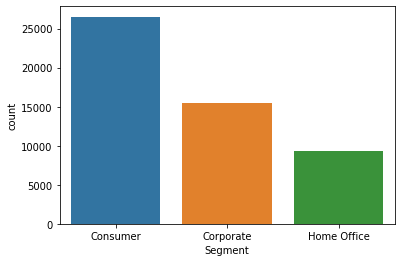

In [15]:
sns.countplot("Segment", data = df, order = descending_order)

### Who are Our top-20 Oldest Customer??/

In [35]:
df.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [39]:
# We check this throuch order Date for this order date data type must be changed

In [37]:
df.dtypes.value_counts(), df.shape 

(object     17
 float64     5
 int64       2
 dtype: int64, (51290, 24))

### Among 24 Columns we can see object is 17 , float64 is 5 and int64 is 2 

In [38]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [40]:
df["Order Date"] = pd.to_datetime(df["Order Date"]) # To date time Format

In [46]:
oldest_customer = pd.DataFrame({"Count":df.groupby(["Order Date", "Customer Name"]).size()}).reset_index()

In [47]:
oldest_customer

,Order Date,Customer Name,Count
0,2011-01-01,Annie Thurman,1
1,2011-01-01,Eugene Moren,1
2,2011-01-01,Joseph Holt,3
3,2011-01-01,Toby Braunhardt,1
4,2011-01-02,Dave Hallsten,3
...,...,...,...
25166,2014-12-31,Shirley Schmidt,1
25167,2014-12-31,Susan Vittorini,1
25168,2014-12-31,Tamara Dahlen,2
25169,2014-12-31,Tracy Collins,1


### 3. which Customers have visited this store just once ?

In [18]:
customer_visited_once = pd.DataFrame({"Count":df.groupby(["Customer Name"]).size()}).reset_index()

In [19]:
customer_visited_once[customer_visited_once["Count"]==1]

,Customer Name,Count


In [25]:
customer_visited_once[customer_visited_once["Count"]==45]

,Customer Name,Count
247,Ed Jacobs,45
320,Harold Pawlan,45
431,Kean Thornton,45
588,Patrick Jones,45
642,Robert Barroso,45
654,Roy Collins,45
719,Stuart Calhoun,45
782,Victoria Brennan,45


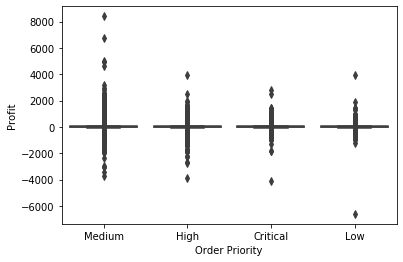

In [30]:
#RelationShip of Order Priority and Profit
df["Order Priority"].value_counts()
sns.boxplot(
"Order Priority",
"Profit",
data = df)

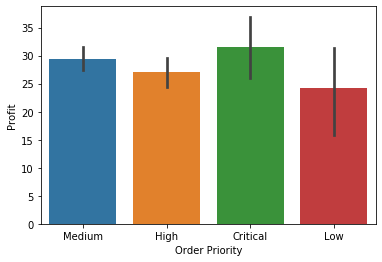

In [33]:
df["Order Priority"].value_counts()
sns.barplot("Order Priority","Profit", data=df)

In [37]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [39]:
#sns.scatterplot("City","Sales", data=df)

#### Find Out the distribution of Customers Market Wise?

In [40]:
df.shape

(51290, 24)

In [42]:
df.Market.value_counts()  #Counts the total Number of Customers 
customers_market = pd.DataFrame({"Count":df.groupby(["Market","Customer Name"]).size()}).reset_index()
customers_market.shape

(4872, 3)

In [43]:
customers_market.head()

,Market,Customer Name,Count
0,APAC,Aaron Bergman,33
1,APAC,Aaron Hawkins,10
2,APAC,Aaron Smayling,5
3,APAC,Adam Bellavance,13
4,APAC,Adam Hart,17


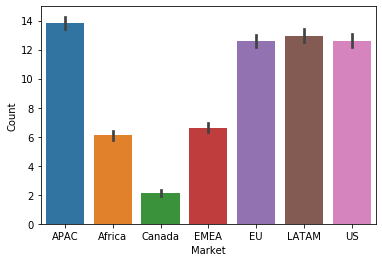

In [47]:
sns.barplot("Market","Count",data=customers_market)

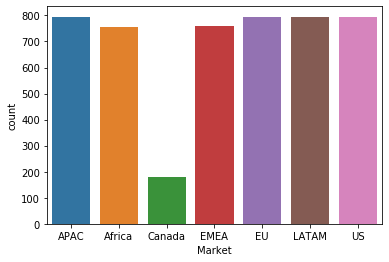

In [48]:
sns.countplot("Market",  data= customers_market)

In [49]:
# What is the distribution of Customers Market wise and Region Wise
df.Region.value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [50]:
customer_market = pd.DataFrame({"Count":df.groupby(["Market", "Region", "Customer Name"]).size()}).reset_index()

In [54]:
customer_market.shape

(11247, 4)

In [55]:
customer_market.head()

,Market,Region,Customer Name,Count
0,APAC,Central Asia,Aaron Bergman,6
1,APAC,Central Asia,Aaron Hawkins,1
2,APAC,Central Asia,Adam Hart,4
3,APAC,Central Asia,Adam Shillingsburg,3
4,APAC,Central Asia,Adrian Barton,4


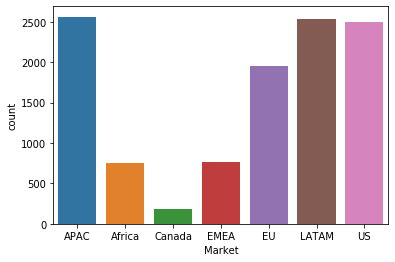

In [57]:
sns.countplot("Market", data = customer_market)

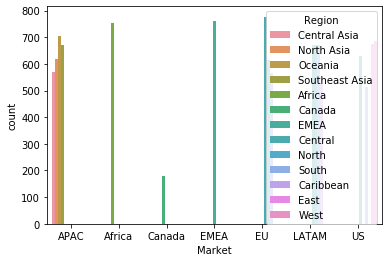

In [58]:
sns.countplot("Market",hue = "Region" , data = customer_market)

## Distribution of Customers by Country  & State top 15

In [60]:
customers_by_country = pd.DataFrame({"Count":df.groupby(["Country" , "State"]).size()}).reset_index().sort_values("Count",ascending=False).head(15)

In [62]:
customers_by_country.head(),customers_by_country.shape

(             Country          State  Count
 1025   United States     California   2001
 1019  United Kingdom        England   1499
 1052   United States       New York   1128
 1063   United States          Texas    985
 336           France  Ile-de-France    981, (15, 3))

### Top 20 Cities by Sales Volume

In [66]:
sale_cities = df.groupby(["City"])["Quantity"].aggregate(np.sum).reset_index().sort_values("Quantity",ascending = False).head(20)

In [69]:
sale_cities[:3]

,City,Quantity
2290,New York City,3417
1910,Los Angeles,2879
2499,Philadelphia,1981


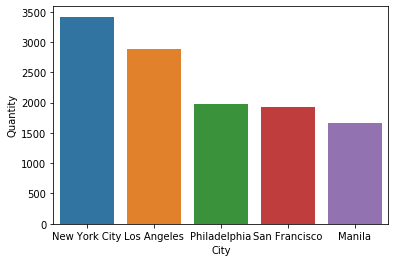

In [74]:
sns.barplot("City","Quantity",data = sale_cities.head(5)) #change head according to your desire

### Top 10 Products

In [70]:
sales_Products = df.groupby(["Product Name"])["Quantity"].aggregate(np.sum).reset_index().sort_values("Quantity",ascending = False).head(20)

In [75]:
sales_Products.head()

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259


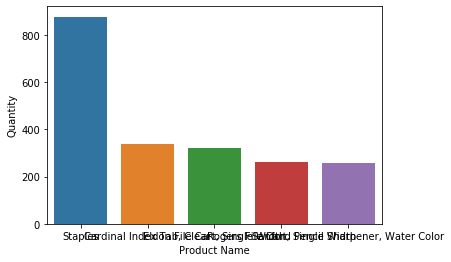

In [77]:
sns.barplot("Product Name", "Quantity",data= sales_Products.head(5))

### Top Selling Products by Countries (in US)


In [78]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [79]:
sales_products_country = df.groupby(["Product Name", "Country"])["Quantity"].aggregate(np.sum).reset_index().sort_values("Quantity",ascending=False)
sale_products_country = df.groupby(["Product Name", "Country"])["Quantity"].sum().reset_index().sort_values("Quantity",ascending=False)

In [80]:
sale_products_country

,Product Name,Country,Quantity
28614,Staples,United States,876
18111,KI Adjustable-Height Table,United States,74
3676,Avery Non-Stick Binders,United States,71
29786,Storex Dura Pro Binders,United States,71
13256,GBC Premium Transparent Covers with Diagonal L...,United States,67
...,...,...,...
26703,"Sauder Library with Doors, Metal",Iraq,1
15869,"Hon Color Coded Labels, Adjustable",Russia,1
15870,"Hon Color Coded Labels, Adjustable",South Korea,1
1608,"Advantus Light Bulb, Black",Turkey,1


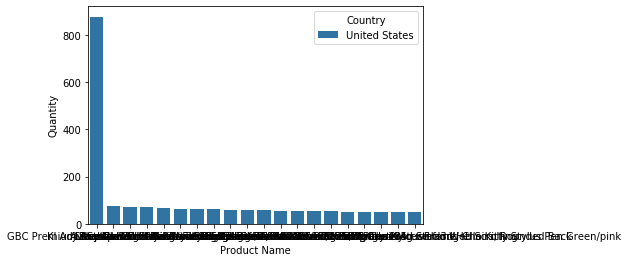

In [81]:
spc = sale_products_country[sale_products_country["Country"]=="United States"].sort_values("Quantity",ascending = False).head(20)
sns.barplot("Product Name", "Quantity", hue="Country",data = spc)